## Import Library

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

## Data Understanding & Data Preparation

In [4]:
data = pd.read_csv("genres_v2.csv")
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,...,46bXU7Sgj7104ZoXxzz9tM,spotify:track:46bXU7Sgj7104ZoXxzz9tM,https://api.spotify.com/v1/tracks/46bXU7Sgj710...,https://api.spotify.com/v1/audio-analysis/46bX...,269208,4,hardstyle,NaN,20995.0,Euphoric Hardstyle
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,...,0he2ViGMUO3ajKTxLOfWVT,spotify:track:0he2ViGMUO3ajKTxLOfWVT,https://api.spotify.com/v1/tracks/0he2ViGMUO3a...,https://api.spotify.com/v1/audio-analysis/0he2...,210112,4,hardstyle,NaN,20996.0,Greatest Hardstyle Playlist
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,...,72DAt9Lbpy9EUS29OzQLob,spotify:track:72DAt9Lbpy9EUS29OzQLob,https://api.spotify.com/v1/tracks/72DAt9Lbpy9E...,https://api.spotify.com/v1/audio-analysis/72DA...,234823,4,hardstyle,NaN,20997.0,Best of Hardstyle 2020
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,...,6HXgExFVuE1c3cq9QjFCcU,spotify:track:6HXgExFVuE1c3cq9QjFCcU,https://api.spotify.com/v1/tracks/6HXgExFVuE1c...,https://api.spotify.com/v1/audio-analysis/6HXg...,323200,4,hardstyle,NaN,20998.0,Euphoric Hardstyle


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [6]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Unnamed: 0
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,20780.000000
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,147.474056,250865.846685,3.972580,10483.970645
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,23.844623,102957.713571,0.268342,6052.359519
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,57.967000,25600.000000,1.000000,0.000000
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,129.931000,179840.000000,4.000000,5255.750000
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,144.973000,224760.000000,4.000000,10479.500000
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,161.464000,301133.000000,4.000000,15709.250000
max,0.988000,1.000000,11.000000,3.148000,1.000000,0.946000,0.988000,0.989000,0.988000,0.988000,220.290000,913052.000000,5.000000,20999.000000


In [7]:
data.isnull().sum()

,0
danceability,0
energy,0
key,0
loudness,0
mode,0
speechiness,0
acousticness,0
instrumentalness,0
liveness,0
valence,0


In [8]:
data.nunique()

,0
danceability,890
energy,917
key,12
loudness,11654
mode,2
speechiness,1447
acousticness,4602
instrumentalness,4757
liveness,1695
valence,1674


In [9]:
columns_to_drop = ["type", "id", "uri", "track_href", "analysis_url",
                  "song_name", "Unnamed: 0", "title", "duration_ms", "time_signature"]
df = data.drop(columns_to_drop, axis=1)

Menghapus Kolom yang tidak relevan
langkah pertama dalam EDA pada proyek klasifikasi genre musik Spotify ini adalah menghapus kolom-kolom yang tidak diperlukan untuk proses pemodelan. Kolom-kolom ini mungkin tidak memberikan informasi yang relevan untuk membedakan genre musik atau bersifat redundant.

In [10]:
df = df[df['genre'] != "Pop"].reset_index(drop=True)

Menghapus semua baris yang memiliki genre "Pop", kemudian mengatur ulang indeks DataFrame hasil filter tersebut agar berurutan kembali mulai dari 0.

Genre "Pop" dihapus untuk mengatasi masalah ketidakseimbangan kelas karena jumlahnya yang dominan, atau karena sifatnya yang terlalu luas sehingga dapat mengganggu model dalam mempelajari fitur pembeda genre lainnya yang lebih spesifik.

In [11]:
genre_mapping = {
    "Trap Metal": "Rap",
    "Underground Rap": "Rap",
    "Emo": "Rap",
    "RnB": "Rap",
    "Hiphop": "Rap",
    "Dark Trap": "Rap"
}
df['genre'] = df['genre'].replace(genre_mapping)

Menyederhanakan atau mengelompokkan beberapa sub-genre spesifik (seperti "Trap Metal", "Underground Rap", "Emo", "RnB", "Hiphop", dan "Dark Trap") menjadi satu kategori genre yang lebih umum, yaitu "Rap".

In [12]:
print(df['genre'].value_counts())

genre
Rap          21064
trance        2999
trap          2987
techhouse     2975
dnb           2966
psytrance     2961
techno        2956
hardstyle     2936
Name: count, dtype: int64


In [13]:
rap_genre = df[df['genre'] == 'Rap'].sample(3000, random_state=42)
other_genre = df[df['genre'] != 'Rap']
df = pd.concat([rap_genre, other_genre]).reset_index(drop=True)

Kode tersebut melakukan downsampling pada genre "Rap" dengan mengambil sampel acak sebanyak 3000 lagu, kemudian menggabungkannya kembali dengan semua lagu dari genre lain untuk menyeimbangkan distribusi kelas

In [14]:
print(df['genre'].value_counts())

genre
Rap          3000
trance       2999
trap         2987
techhouse    2975
dnb          2966
psytrance    2961
techno       2956
hardstyle    2936
Name: count, dtype: int64


In [15]:
# Create new features
df['energy_danceability'] = df['energy'] * df['danceability']
df['acousticness_instrumentalness'] = df['acousticness'] * df['instrumentalness']
df['loudness_speechiness'] = df['loudness'] * df['speechiness']
df['tempo_energy'] = df['tempo'] * df['energy']

Melakukan feature engineering dengan menciptakan empat fitur baru dalam DataFrame df. Fitur-fitur baru ini (energy_danceability, acousticness_instrumentalness, loudness_speechiness, tempo_energy) merupakan hasil perkalian dari pasangan fitur yang sudah ada, yang berpotensi menangkap interaksi antar fitur tersebut untuk meningkatkan performa model.

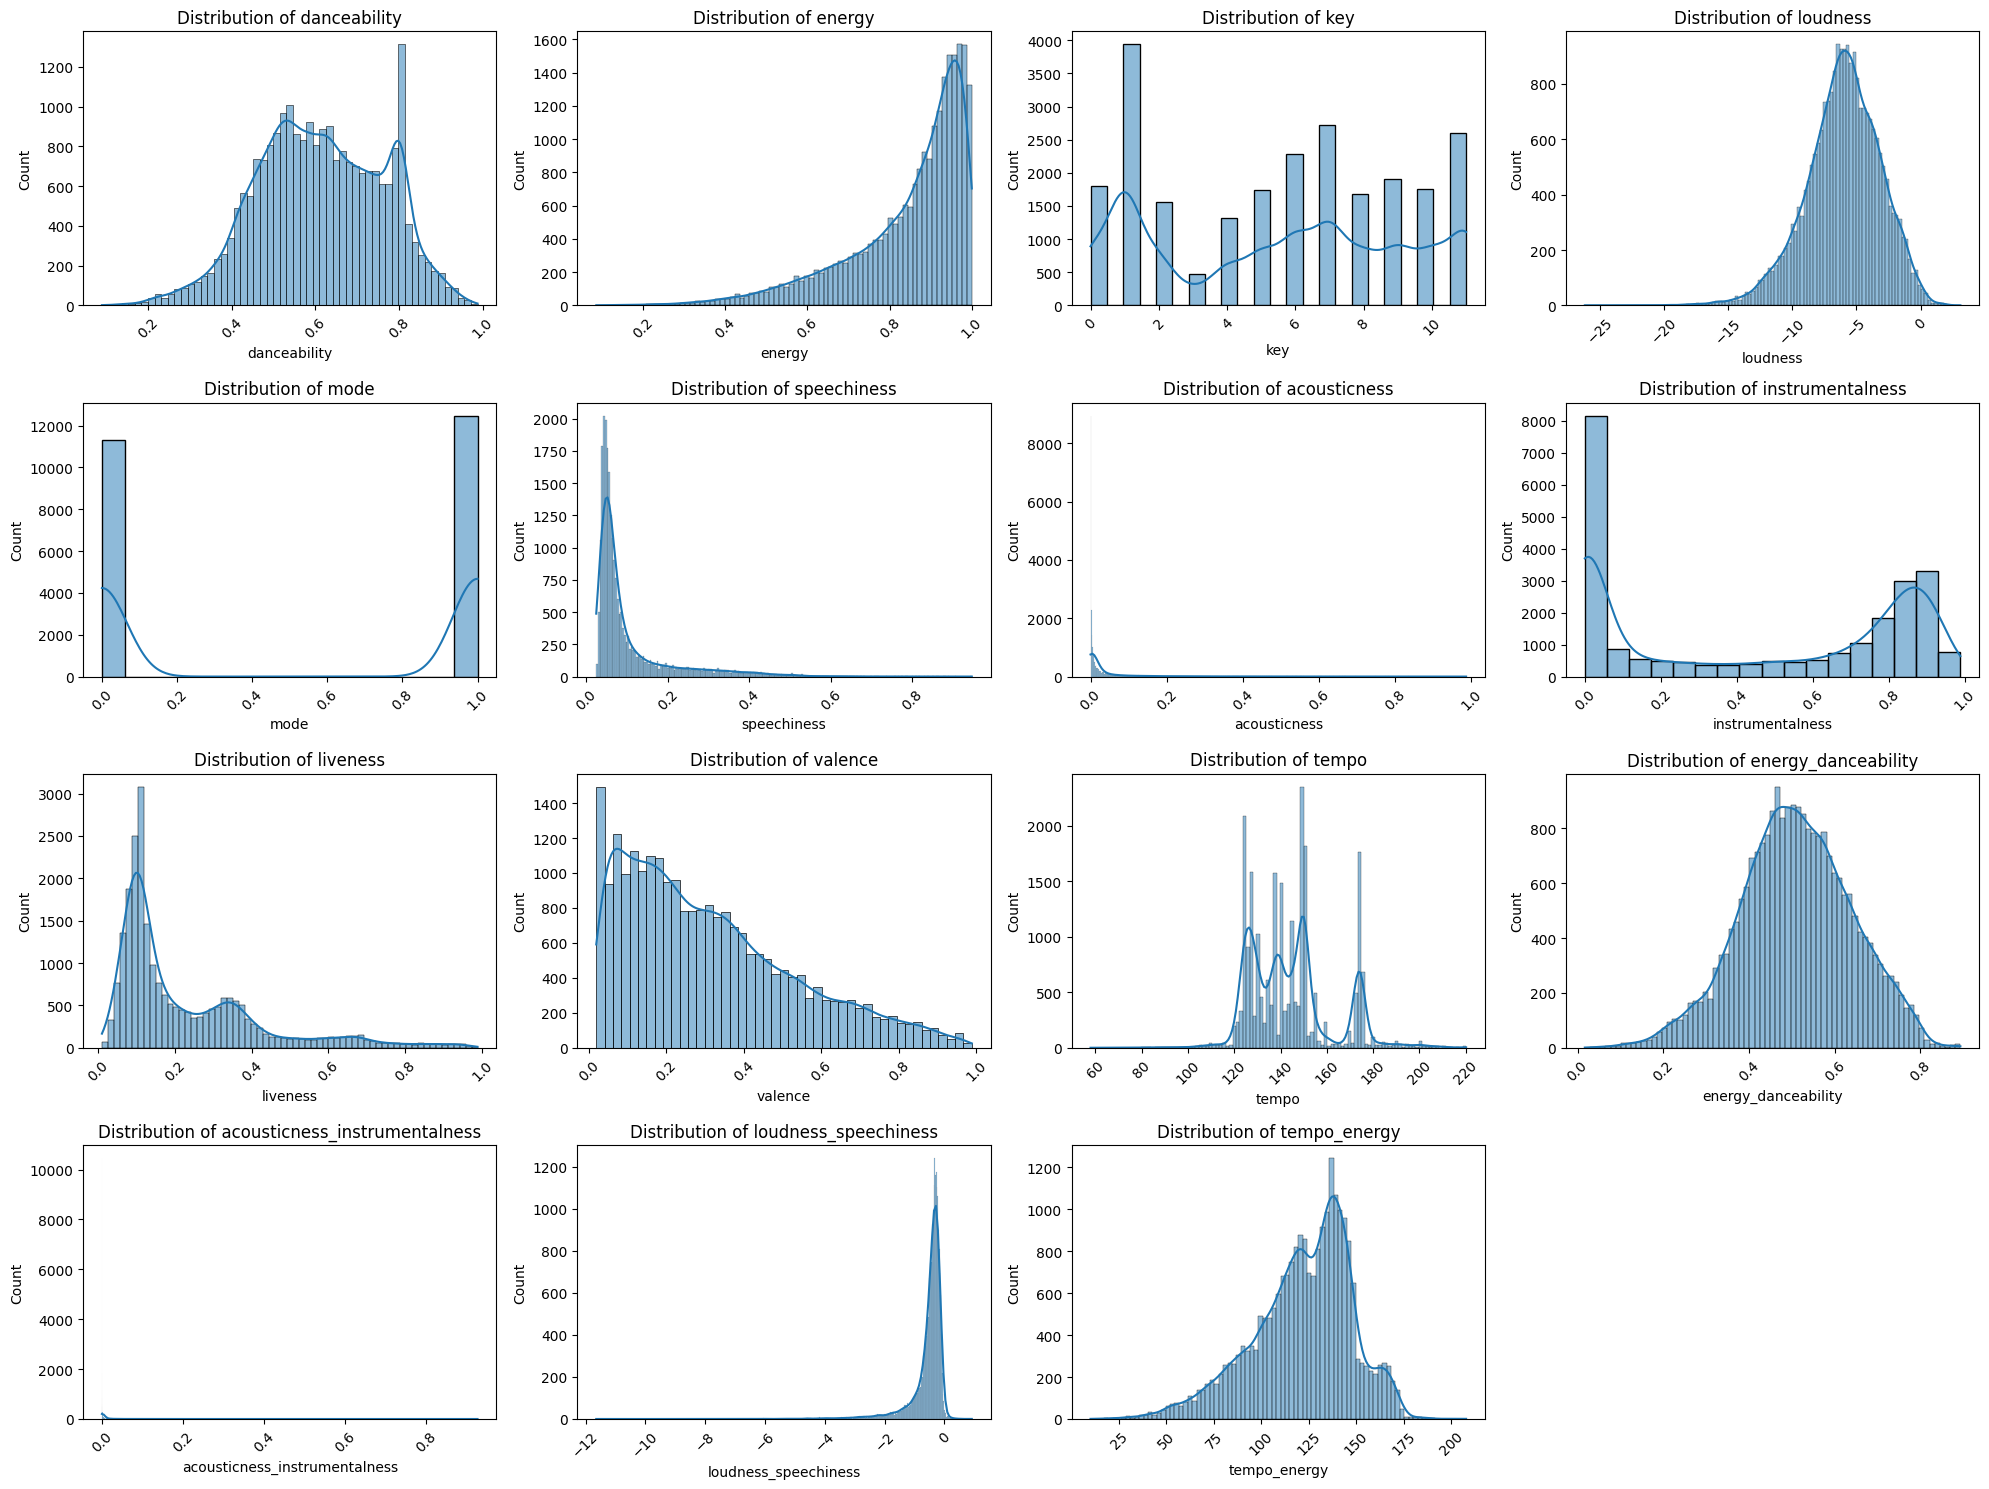

In [16]:
numerical_features = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20, 15))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=df, x=feature, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi ini menampilkan histogram distribusi berbagai fitur audio dari dataset lagu Spotify. Banyak fitur seperti speechiness, acousticness, dan instrumentalness sangat condong ke kanan (right-skewed), menunjukkan mayoritas lagu memiliki nilai rendah pada fitur-fitur ini, sementara fitur seperti danceability, energy, dan loudness menunjukkan distribusi yang lebih simetris atau sedikit condong. Fitur-fitur baru yang diciptakan, seperti energy_danceability, umumnya mencerminkan karakteristik distribusi dari fitur-fitur asalnya.

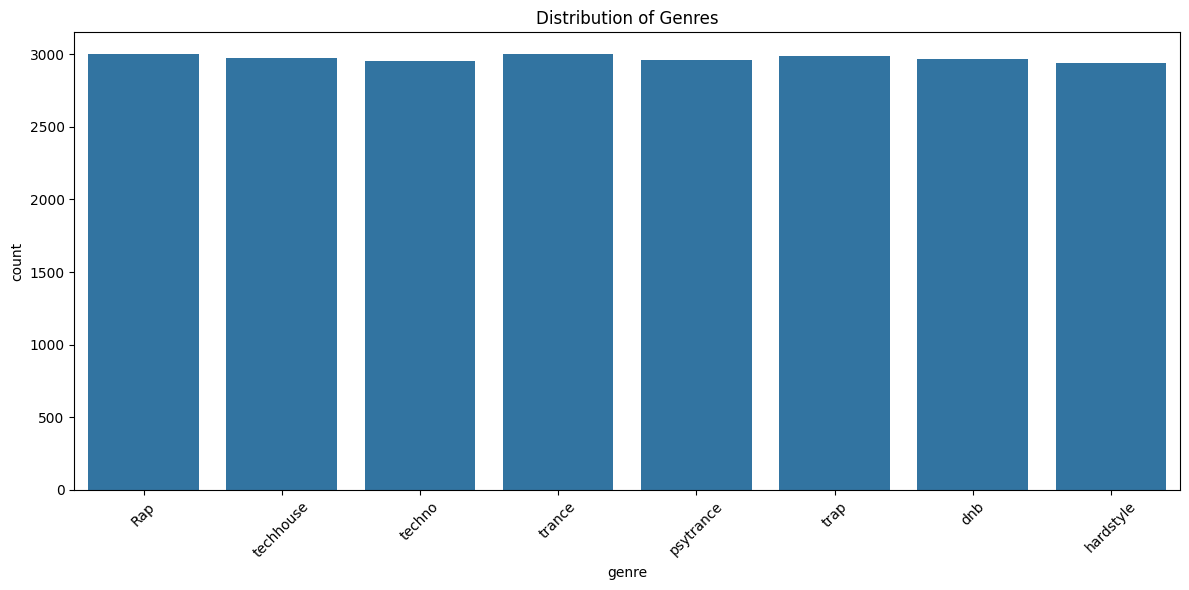

In [17]:
# Genre distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='genre')
plt.xticks(rotation=45)
plt.title('Distribution of Genres')
plt.tight_layout()
plt.show()

Jumlah lagu untuk setiap genre (Rap, techhouse, techno, trance, psytrance, trap, dnb, hardstyle) kini relatif seimbang, masing-masing mendekati sekitar 3000 sampel. Keseimbangan ini penting untuk mencegah bias model terhadap genre tertentu selama pelatihan.

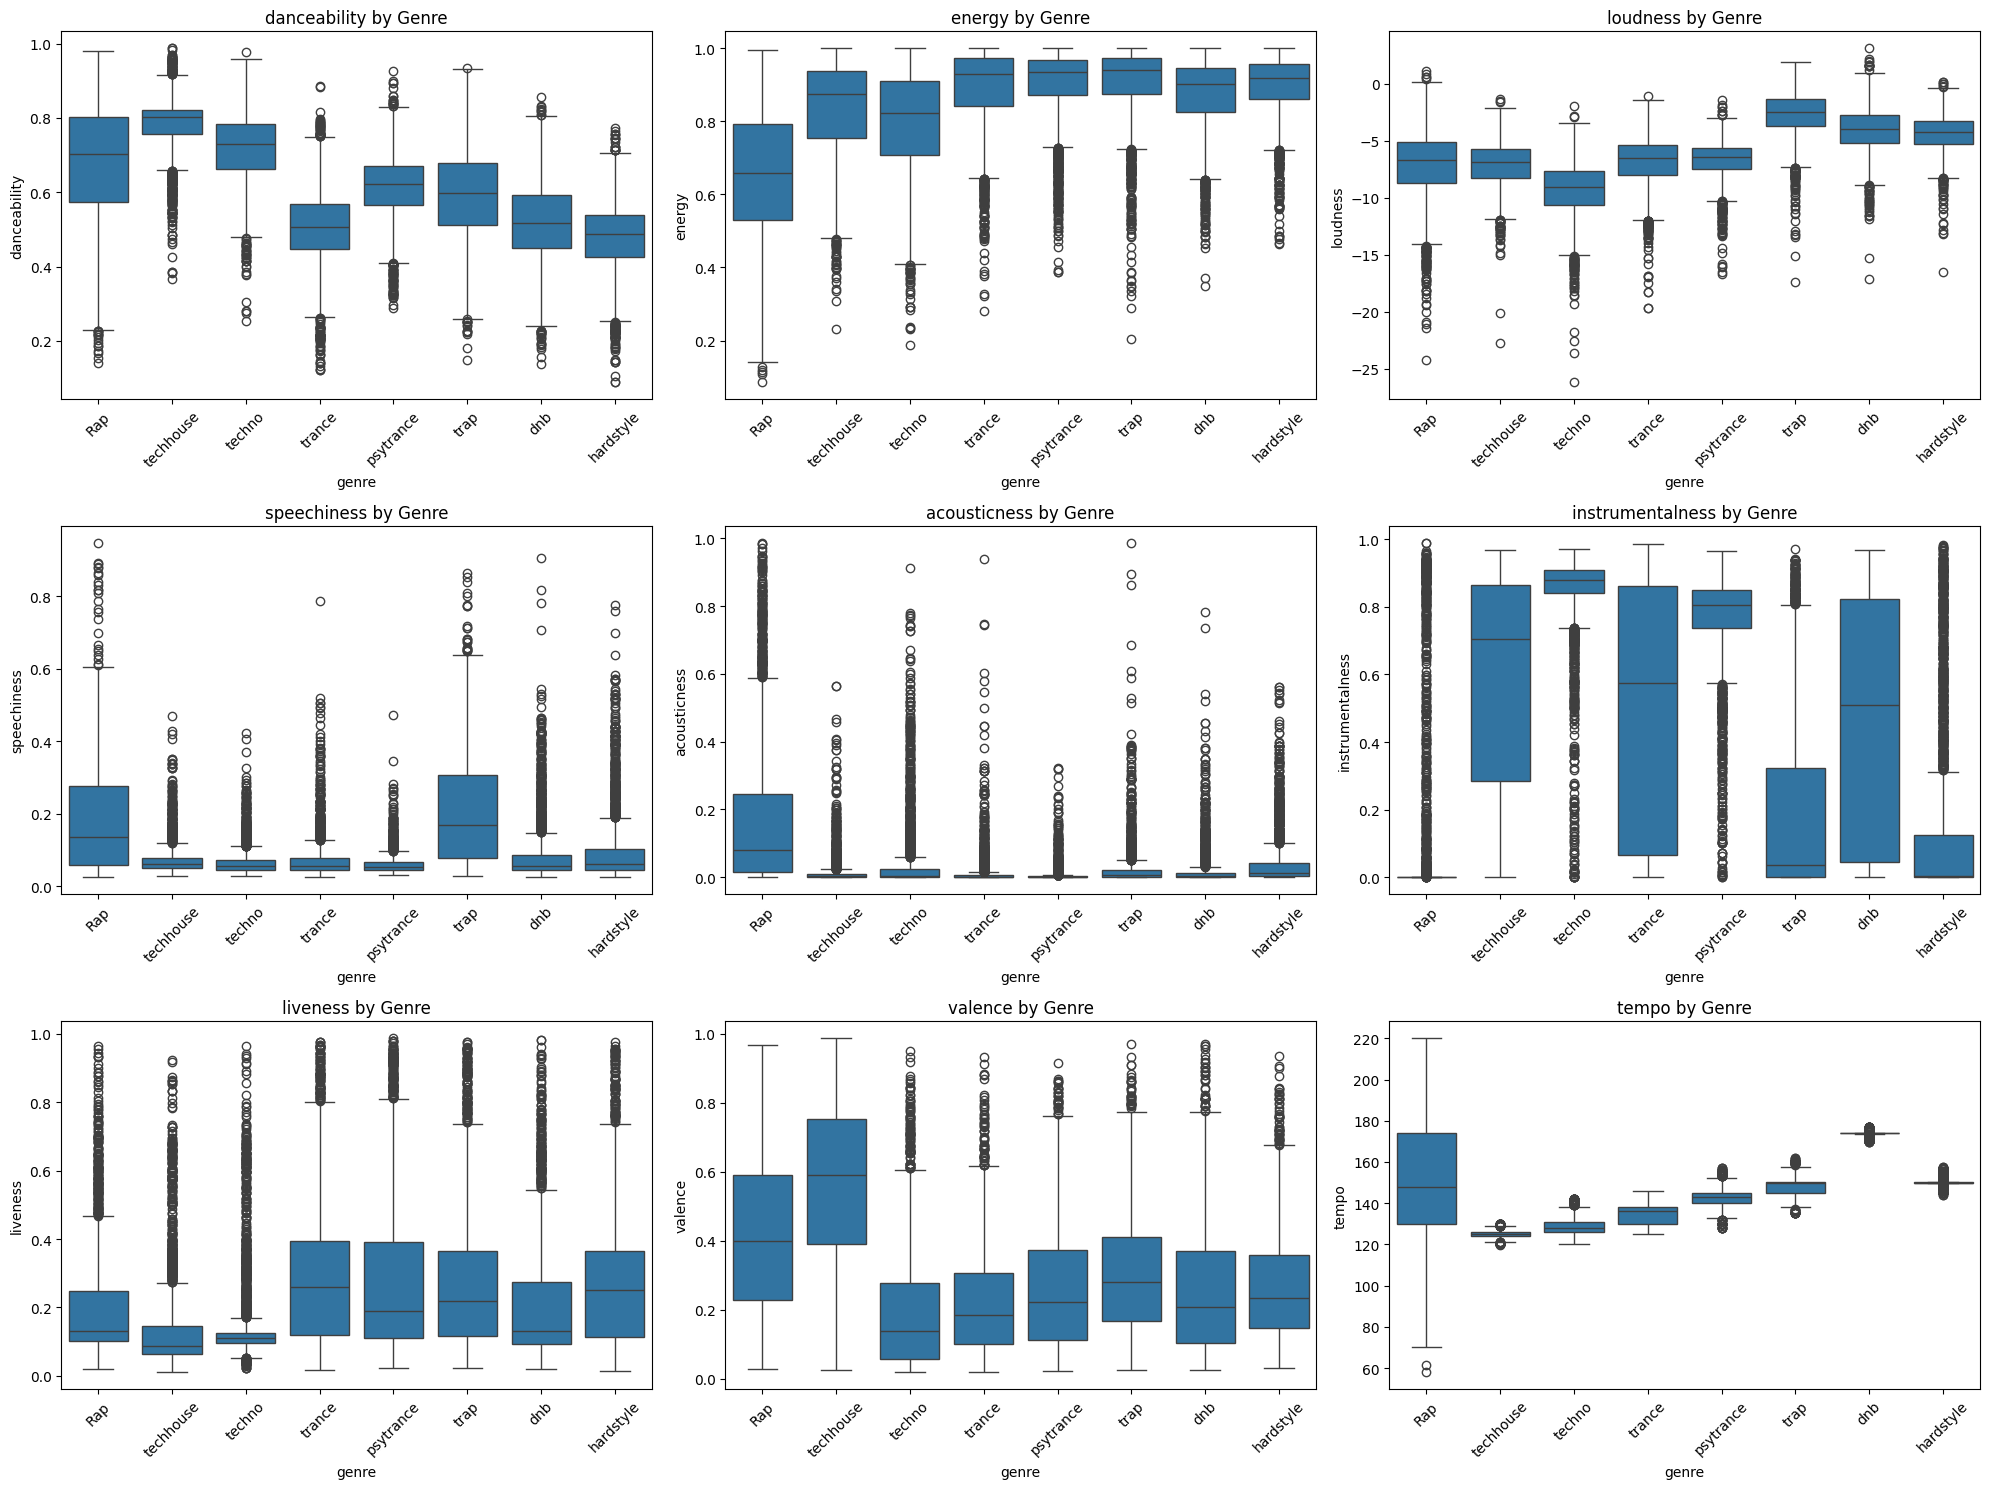

In [18]:
# Box plots for key features by genre
key_features = ['danceability', 'energy', 'loudness', 'speechiness',
                'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

plt.figure(figsize=(20, 15))
for i, feature in enumerate(key_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='genre', y=feature)
    plt.xticks(rotation=45)
    plt.title(f'{feature} by Genre')
plt.tight_layout()
plt.show()

Visualisasi ini menampilkan box plot yang membandingkan distribusi berbagai fitur audio (seperti danceability, energy, instrumentalness, speechiness, tempo) untuk setiap genre musik. Terlihat jelas bahwa beberapa fitur memiliki pola distribusi yang sangat berbeda antar genre, misalnya instrumentalness yang tinggi untuk genre elektronik seperti techno dan trance namun rendah untuk Rap, atau speechiness yang lebih tinggi pada genre Rap dan Trap

Mengingat data tersebut adalah fitur audio musik, outliers seringkali merepresentasikan variasi atau karakteristik unik yang valid dalam lagu atau genre tertentu, sehingga membersihkannya berpotensi menghilangkan informasi penting untuk klasifikasi.

<Figure size 1500x1500 with 0 Axes>

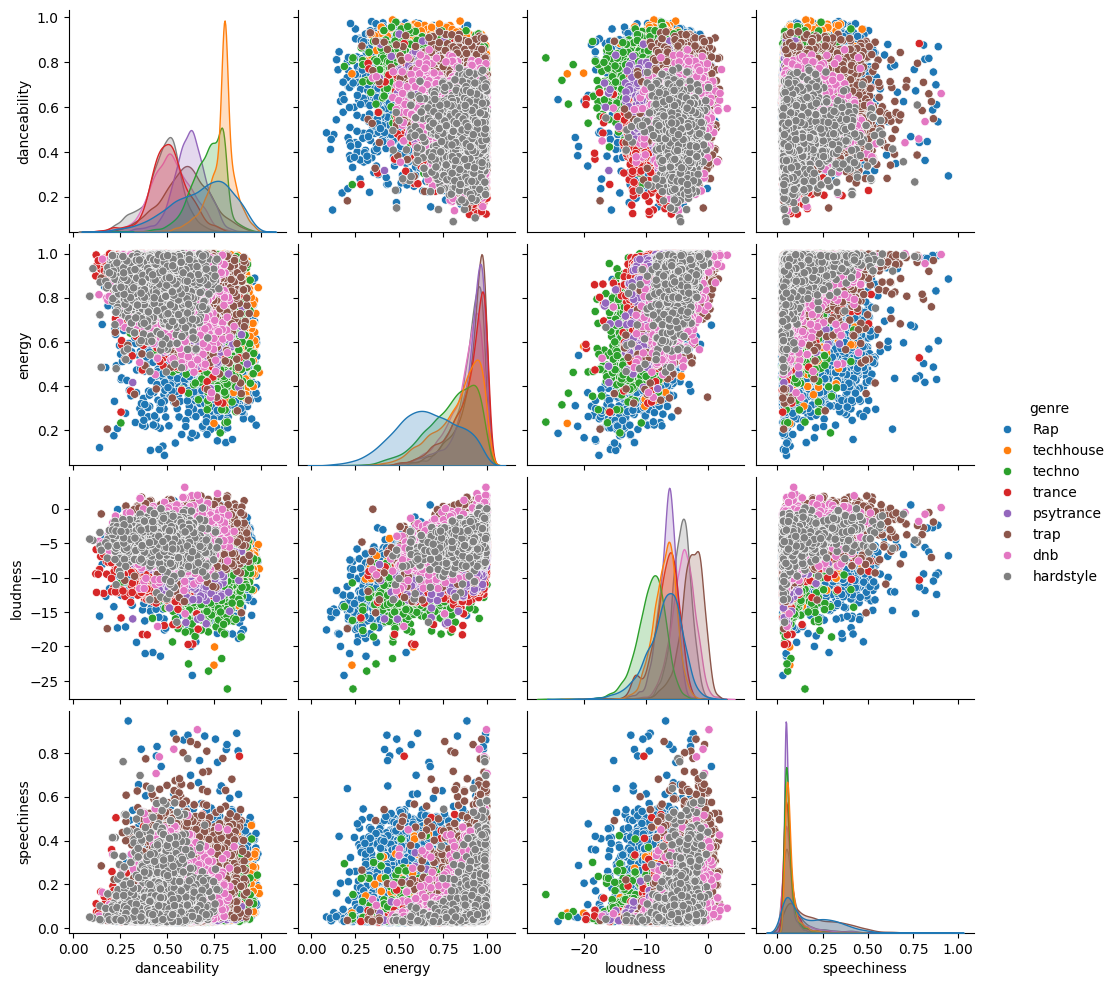

In [19]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[['danceability', 'energy', 'loudness', 'speechiness', 'genre']],
             hue='genre', diag_kind='kde')
plt.show()

Visualisasi pair plot ini menampilkan bagaimana fitur-fitur kunci seperti danceability, energy, loudness, dan speechiness terdistribusi untuk setiap genre (pada panel diagonal) dan bagaimana mereka berinteraksi satu sama lain (pada panel scatter plot di luar diagonal), dengan setiap genre diwakili oleh warna yang berbeda. Sangat jelas terlihat bahwa speechiness menjadi pembeda kuat, dimana genre Rap dan Trap menunjukkan nilai yang jauh lebih tinggi dibandingkan genre lain, sementara genre elektronik seperti techno, trance, dan hardstyle cenderung berkelompok dengan nilai energy dan loudness yang tinggi, menunjukkan adanya pola yang dapat dieksploitasi untuk klasifikasi. Hubungan antar fitur lainnya juga memperlihatkan beberapa kecenderungan pengelompokan genre meskipun ada tumpang tindih, yang mengindikasikan pentingnya kombinasi fitur dalam membedakan genre musik.

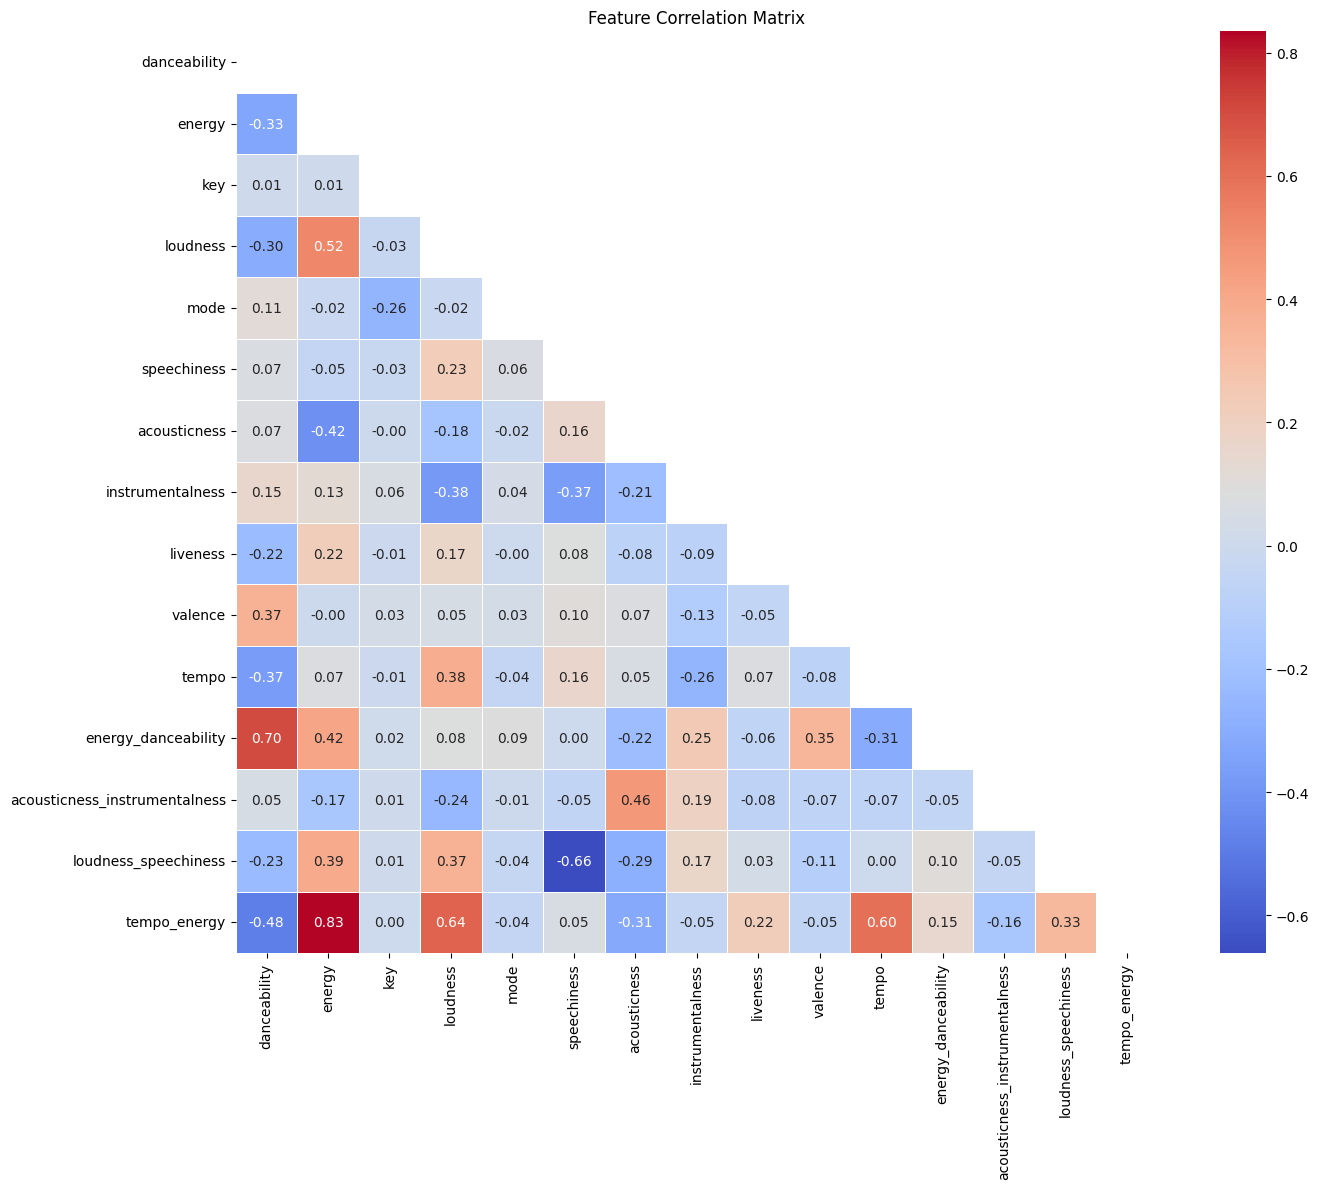

In [20]:
# Correlation heatmap
plt.figure(figsize=(15, 12))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
mask = np.triu(correlation_matrix)
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            square=True, linewidths=.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Visualisasi ini adalah matriks korelasi fitur yang menunjukkan bagaimana setiap pasang fitur dalam dataset saling berhubungan secara linear, dengan warna merah mengindikasikan korelasi positif kuat dan biru untuk korelasi negatif kuat.

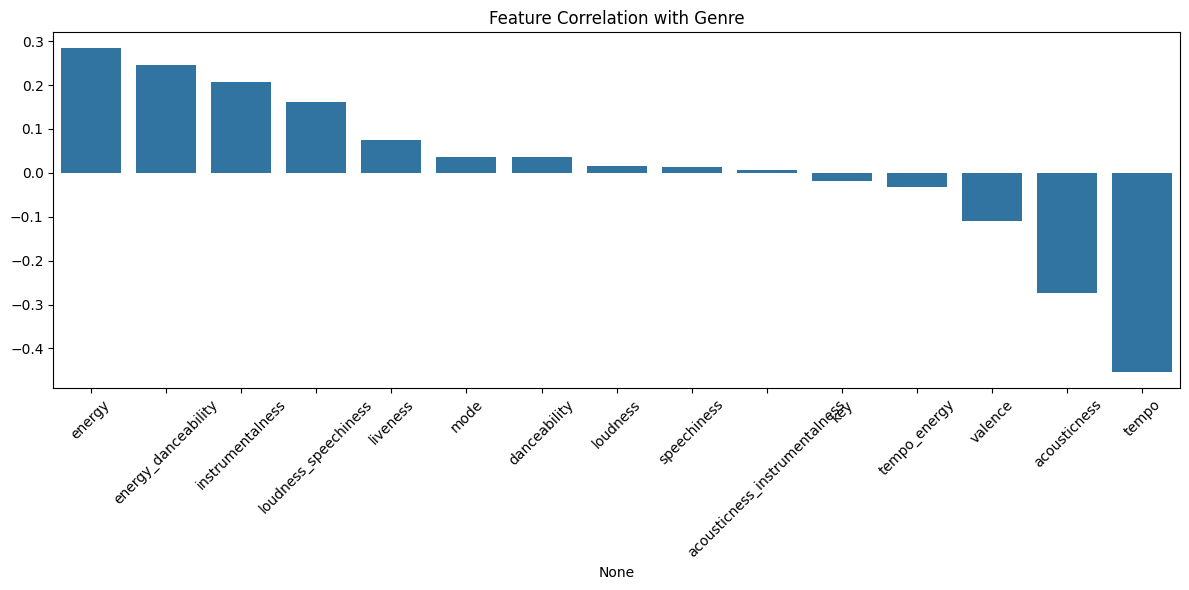

In [21]:
# Correlation with target variable (using encoded genre)
plt.figure(figsize=(12, 6))
# Create a copy of numerical features
numerical_df = df.select_dtypes(include=[np.number]).copy()
# Add encoded genre
le = LabelEncoder()
numerical_df['genre_encoded'] = le.fit_transform(df['genre'])
correlations = numerical_df.corr()['genre_encoded'].sort_values(ascending=False)
correlations = correlations.drop('genre_encoded')  # Remove self-correlation
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45)
plt.title('Feature Correlation with Genre')
plt.tight_layout()
plt.show()

Berikut adalah diagram batang yang menampilkan koefisien korelasi antara setiap fitur audio dengan variabel target "genre" yang kemungkinan telah diubah menjadi representasi numerik. Fitur tempo menunjukkan korelasi negatif terkuat (sekitar -0.45), sementara energy menunjukkan korelasi positif terkuat (sekitar +0.28), diikuti oleh energy_danceability dan instrumentalness dengan korelasi positif yang juga cukup menonjol, serta acousticness dengan korelasi negatif yang signifikan. Hal ini mengindikasikan bahwa fitur-fitur dengan nilai korelasi (baik positif maupun negatif) yang lebih besar cenderung memiliki hubungan linear yang lebih kuat dengan urutan numerik genre tersebut, dan berpotensi menjadi prediktor yang lebih penting dalam model klasifikasi.

In [22]:
X = df.drop('genre', axis=1)
y = df['genre']

Dataset dibagi menjadi dua bagian: fitur (variabel independen) yang disimpan dalam X dengan menghapus kolom 'genre', dan target (variabel dependen, yaitu 'genre' itu sendiri) yang disimpan dalam y

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Fungsi train_test_split, data X dan y tersebut dibagi lagi menjadi data latih (X_train, y_train) dan data uji (X_test, y_test), dimana 20% dari total data dialokasikan untuk pengujian (test_size=0.2)

In [24]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MinMaxScaler untuk menormalkan fitur pada data latih dan data uji, mengubah skala setiap fitur ke rentang antara 0 dan 1. Proses ini memastikan konsistensi perlakuan data dan mencegah kebocoran informasi dari data uji ke proses pelatihan model dengan hanya melakukan fit pada data latih

In [25]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

LabelEncoder untuk mengubah label genre tekstual pada data target menjadi representasi numerik

## Modeling

### Random Forest Model

In [26]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train_scaled, y_train_encoded)
rf_pred = rf_model.predict(X_test_scaled)

### Neural Network Model

In [27]:
early_stopping1 = keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=15,
    restore_best_weights=True
)

early_stopping2 = keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    patience=15,
    restore_best_weights=True
)

model = keras.Sequential([
    keras.layers.Input(name="input", shape=(X_train_scaled.shape[1],)),

    keras.layers.Dense(512, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(256, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),

    keras.layers.Dense(128, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Dense(len(np.unique(y_train_encoded)), activation="softmax")
])

optimizer = keras.optimizers.Adam(learning_rate=0.0003)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,032 (691.53 KB)

 Trainable params: 175,240 (684.53 KB)

 Non-trainable params: 1,792 (7.00 KB)

In [28]:
history = model.fit(
    X_train_scaled, y_train_encoded,
    epochs=150,
    batch_size=64,
    validation_data=(X_test_scaled, y_test_encoded),
    callbacks=[early_stopping1, early_stopping2],
    verbose=1
)

Epoch 1/150
298/298 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.4737 - loss: 1.5553 - val_accuracy: 0.3150 - val_loss: 1.8166
Epoch 2/150
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7107 - loss: 0.8334 - val_accuracy: 0.7250 - val_loss: 0.7316
Epoch 3/150
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7646 - loss: 0.6879 - val_accuracy: 0.8352 - val_loss: 0.4905
Epoch 4/150
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7767 - loss: 0.6234 - val_accuracy: 0.8440 - val_loss: 0.4610
Epoch 5/150
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7894 - loss: 0.5952 - val_accuracy: 0.8438 - val_loss: 0.4492
Epoch 6/150
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7998 - loss: 0.5664 - val_accuracy: 0.8452 - val_loss: 0.4437
Epoch 7/150
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8052 - loss: 0.5560 - val_accuracy: 0.8532 - val_loss: 0.4267
Epoch 8/150
298/298 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8087 - loss: 0.5389 - val_accu

## Evaluation

In [29]:
print("\nRandom Forest Results:")
print("Accuracy:", metrics.accuracy_score(y_test_encoded, rf_pred))
print("F1 Score:", metrics.f1_score(y_test_encoded, rf_pred, average='weighted'))
print("\nClassification Report:")
print(metrics.classification_report(y_test_encoded, rf_pred))


Random Forest Results:
Accuracy: 0.894869638351556
F1 Score: 0.8947093249706041

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.84      0.87       567
           1       0.99      0.98      0.99       610
           2       0.90      0.93      0.91       583
           3       0.89      0.91      0.90       599
           4       0.91      0.91      0.91       626
           5       0.84      0.83      0.83       575
           6       0.85      0.90      0.88       595
           7       0.89      0.85      0.87       601

    accuracy                           0.89      4756
   macro avg       0.89      0.89      0.89      4756
weighted avg       0.90      0.89      0.89      4756



Hasil evaluasi model Random Forest menunjukkan secara keseluruhan, model mencapai akurasi sekitar 0.8949 dan F1-score sekitar 0.8947. Ini berarti model mampu mengklasifikasikan genre musik dengan benar pada sekitar 89.5% kasus dari data uji.

In [30]:
# Neural Network Evaluation
nn_pred = model.predict(X_test_scaled).argmax(axis=1)
print("\nNeural Network Results:")
print("Accuracy:", metrics.accuracy_score(y_test_encoded, nn_pred))
print("F1 Score:", metrics.f1_score(y_test_encoded, nn_pred, average='weighted'))
print("\nClassification Report:")
print(metrics.classification_report(y_test_encoded, nn_pred))

149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Neural Network Results:
Accuracy: 0.8814129520605551
F1 Score: 0.8810101058563683

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.81      0.86       567
           1       0.97      1.00      0.99       610
           2       0.88      0.90      0.89       583
           3       0.86      0.90      0.88       599
           4       0.87      0.92      0.89       626
           5       0.81      0.82      0.82       575
           6       0.85      0.87      0.86       595
           7       0.89      0.82      0.86       601

    accuracy                           0.88      4756
   macro avg       0.88      0.88      0.88      4756
weighted avg       0.88      0.88      0.88      4756



Model neural network mencapai Akurasi sekitar 0.8814 dan F1 Score (rata-rata makro) sekitar 0.8810. Ini berarti sekitar 88.1% dari lagu dalam data uji berhasil diklasifikasikan dengan benar oleh model Neural Network.

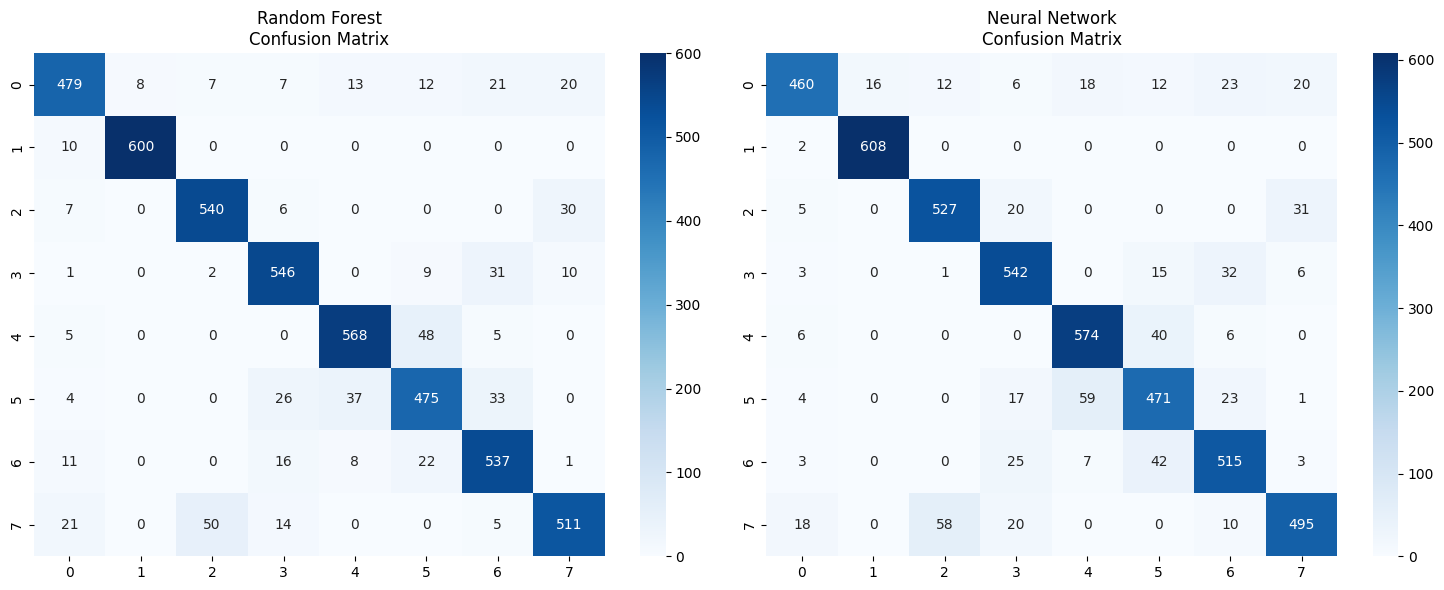

In [31]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.heatmap(metrics.confusion_matrix(y_test_encoded, rf_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest\nConfusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(metrics.confusion_matrix(y_test_encoded, nn_pred),
            annot=True, fmt='d', cmap='Blues')
plt.title('Neural Network\nConfusion Matrix')
plt.tight_layout()
plt.show()

Random Forest menunjukkan performa klasifikasi yang lebih baik daripada Neural Network. Hal ini terlihat dari nilai diagonal (prediksi benar) yang umumnya lebih tinggi pada Random Forest, terutama untuk kelas 1, 2, 3, 4, dan 6. Random Forest juga menunjukkan lebih sedikit kesalahan klasifikasi antar kelas dibandingkan Neural Network.

Neural Network cenderung menghasilkan lebih banyak misklasifikasi, terutama terlihat pada kelas 2, 3, 5, 6, dan 7 yang memiliki beberapa prediksi salah tersebar ke kelas lain. Namun, Neural Network menunjukkan performa yang cukup baik untuk kelas 1 dan 4.

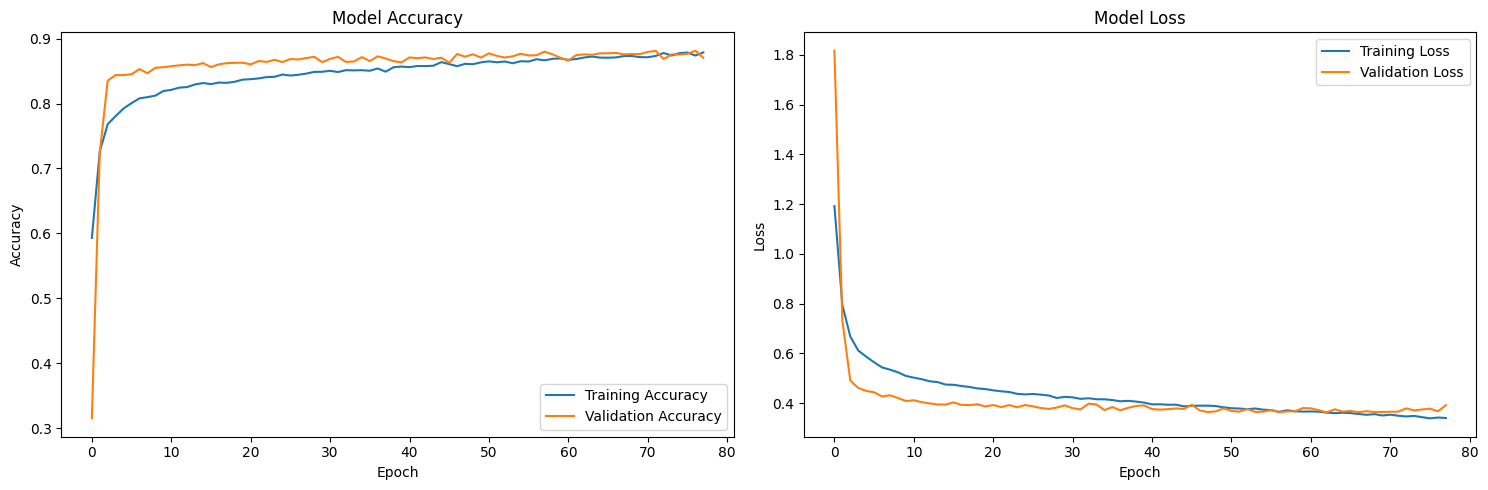

In [32]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [33]:
print("\nModel Comparison Summary:")
models = {
    'Random Forest': rf_pred,
    'Neural Network': nn_pred
}

comparison_df = pd.DataFrame({
    'Model': list(models.keys()),
    'Accuracy': [metrics.accuracy_score(y_test_encoded, pred) for pred in models.values()],
    'F1 Score': [metrics.f1_score(y_test_encoded, pred, average='weighted') for pred in models.values()]
})

print("\n", comparison_df.to_string(index=False))


Model Comparison Summary:

          Model  Accuracy  F1 Score
 Random Forest  0.894870  0.894709
Neural Network  0.881413  0.881010


Secara keseluruhan, Random Forest sedikit lebih akurat dan konsisten dalam mengklasifikasikan semua kelas dibandingkan Neural Network untuk dataset ini.